<h1>Socio-economic Indicators in Chicago</h1>

- Analyzing a real world dataset with SQL and Python

A detailed description of the dataset can be found on the city of Chicago's website, but to summarize, the dataset has the following variables:

- <b>Community Area Number (ca)</b>: Used to uniquely identify each row of the dataset

- <b>Community Area Name (community_area_name)</b>: The name of the region in the city of Chicago

- <b>Percent of Housing Crowded (percent_of_housing_crowded)</b>: Percent of occupied housing units with more than one person per room

- <b>Percent Households Below Poverty (percent_households_below_poverty)</b>: Percent of households living below the federal poverty line

- <b>Percent Aged 16+ Unemployed (percent_aged_16_unemployed)</b>: Percent of persons over the age of 16 years that are unemployed

- <b>Percent Aged 25+ without High School Diploma (percent_aged_25_without_high_school_diploma)</b>: Percent of persons over the age of 25 years without a high school education

- <b>Percent Aged Under 18 or Over 64</b>:Percent of population under 18 or over 64 years of age (percent_aged_under_18_or_over_64): (ie. dependents)

- <b>Per Capita Income (per_capita_income_)</b>: Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

- <b>Hardship Index (hardship_index)</b>: Score that incorporates each of the six selected socioeconomic indicators

- Connecting to the database for storing data on server
- Loading SQL extension

In [1]:
%load_ext sql

- Connecting to IBM DB through SQL alchemy

In [2]:
%sql ibm_db_sa://hsr89882:ln%2Bt4bgl1l2fv55t@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: hsr89882@BLUDB'

- Importing the required libraries

In [1]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

- Importing warnings library to ignore warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

- Reading the CSV from the web

In [3]:
chicago = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

- Inserting data into Table chicago

In [6]:
%sql PERSIST chicago

 * ibm_db_sa://hsr89882:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago'

- Checking the dataset

In [7]:
%sql SELECT * FROM chicago limit 5;

 * ibm_db_sa://hsr89882:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


- <b>How many rows are in the dataset?</b>

In [8]:
%sql SELECT COUNT(*) FROM chicago;

 * ibm_db_sa://hsr89882:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


- <b>Checking the size of the data</b> 

In [9]:
chicago.shape

(78, 9)

- <b>How many community areas in Chicago have a hardship index greater than 50.0?</b>

In [10]:
%sql SELECT COUNT(*) FROM chicago WHERE hardship_index > 50

 * ibm_db_sa://hsr89882:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


- <b>What is the maximum value of hardship index in this dataset?</b>

In [11]:
%sql SELECT MAX(HARDSHIP_INDEX) FROM chicago

 * ibm_db_sa://hsr89882:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


- <b>Which community area which has the highest hardship index?</b>


In [12]:
%sql SELECT community_area_name FROM chicago ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY; 

 * ibm_db_sa://hsr89882:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


- <b>Which Chicago community areas have per-capita incomes greater than $60,000?</b>

In [13]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://hsr89882:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


- <b>Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.<b>

 * ibm_db_sa://hsr89882:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


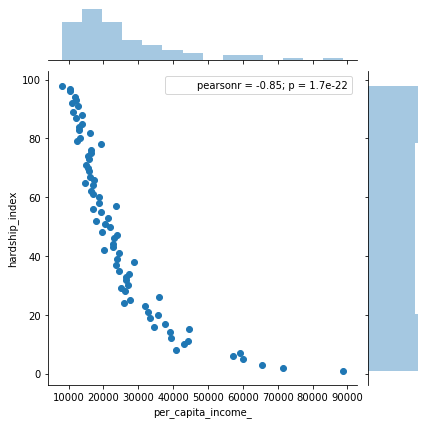

In [14]:
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())
plot.annotate(stats.pearsonr)

- Relationship between each variables

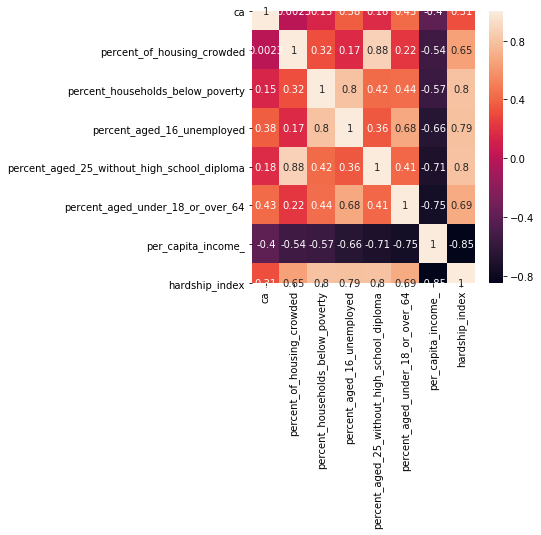

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(chicago.corr(),annot=True)

In [5]:
import pandas_profiling as pp
pp.ProfileReport(chicago)